<a href="https://colab.research.google.com/github/mafreitasbarreto/Redes-Complexas/blob/main/Trabalho_Pr%C3%A1tico_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalando o pacote Wikipedia
!pip install wikipedia

Importando Pacotes e Bibliotecas

In [2]:
#Importando bibliotecas
import wikipedia
import networkx as  nx
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
from numpy.ma.core import argmax

Definindo o idioma Português do Brasil


In [3]:
# Wikipedia em português
wikipedia.set_lang('pt')

O tópico inicial selecionado da Wikipédia-pt foi “Copa do Mundo”, que mostrou-se possível iniciar a página e gerar seu conjunto de vizinhos diretos, sem ocorrência de erros.

Em seguida, foi gerada uma rede direcionada com 500 nós, mediante uma caminhada aleatória  entre o nó inicial e os seus vizinhos


In [4]:
F = nx.DiGraph() #inicia um grafo vazio

raiz = "Copa do mundo"   #Nó selecionado da Wikipedia-pt
w = wikipedia.page(raiz) #Nó inicial raiz/pode ser carregada a página?
wiki = w.links           #Vizinhos da raiz/pode ser carregada a página?
tam = 500                #Numero de nós gerados no Grafo


def gera_grafo(raiz, tam): #Cria um subgrafo N dos vizinhos da raiz e suas conexões
   while len(F.nodes)<2:     #Escolha da Aresta inicial sem erros
    s = list(wiki)  #lista dos vizinhos
    s_cnj = set(s)  #conjunto dos vizinhos
    try:
     m = random.choice(s)
     mk = wikipedia.page(m)
     mv= mk.links
    except:
     continue
    if raiz!= m:
      F.add_edge(raiz,m)
   while len(F.nodes)<tam: #Faça até atingir o número de nós
     try:
       k = wikipedia.page(m) #pode ser carregada a página?
       k_v = k.links
     except:
       m = raiz  # Senão retorna para a raiz
       print('Não pude carregar m', m )
       continue
     k_lst = list(k_v)
     k_cnj = set(k_lst)
     n = list(s_cnj.intersection(k_cnj)) #interseção vizinhos da raiz
     if len(n)>0:
          try:
             j=random.choice(n) #pode ser carregada a página?
             verifica_pagina = wikipedia.page(j)
             verifica_vizinhos = verifica_pagina.links
          except:
             continue
          if (m,j) not in F.edges and m!=j:
            F.add_edge(m,j)
            m = j
          elif j != raiz and raiz in verifica_vizinhos and (j,raiz) not in F.edges: # raiz é vizinho do nó
             F.add_edge(j,raiz)
             m = raiz
          else:
            m=raiz   # Se condições não satisfeitas retorne a raiz
     elif m in s_cnj and m != raiz and raiz in k_v and (m,raiz) not in F.edges: # raiz é vizinho do nó
             F.add_edge(m,raiz)
             m = raiz
     else:
         m=raiz

if len(wiki)<tam:
      print('número de vizinhos inferior ao tamanho')
else:
  gera_grafo(raiz,tam)

print("{} nós, {} arestas".format(F.order(), nx.number_of_edges(F)))
with open("copa.p", 'wb') as f: # salva a rede em um arquivo .p
    pickle.dump(F, f)


500 nós, 1173 arestas


  Gráficos da rede usando os formatos Kamada Kawai e Circular.

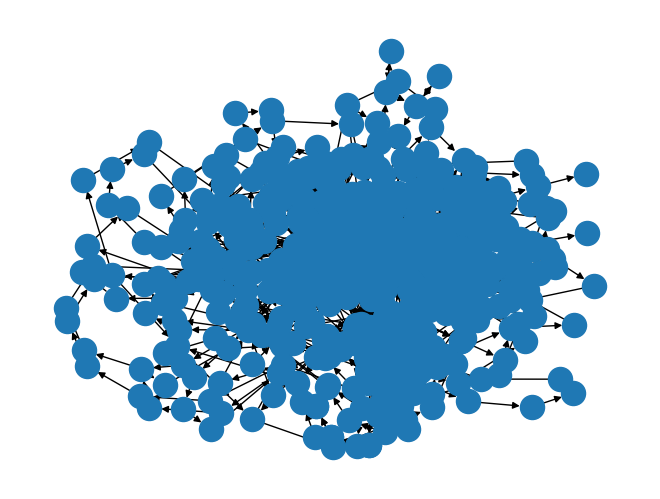

In [5]:
nx.draw_kamada_kawai(F) # Gráfico em Kamada Kawai

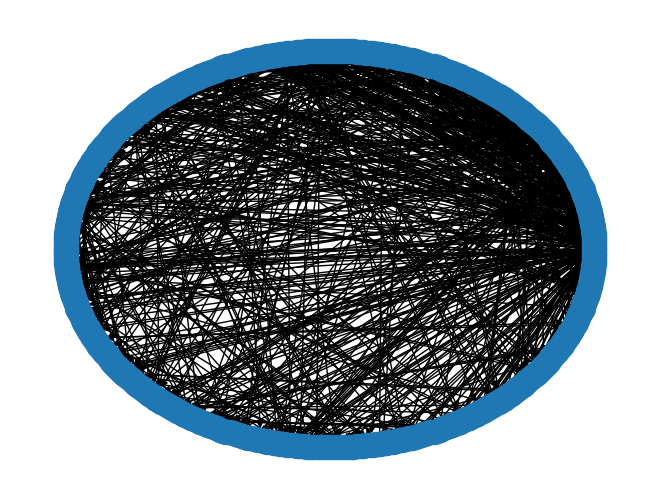

In [6]:
nx.draw_circular(F) # Grafico circular

Visualização dos nós(vértices) gerados

In [7]:
#Nós em F
print(F.nodes)

['Copa do mundo', 'Adidas Telstar', 'Slazenger Challenge 4-Star', 'Wayback Machine', 'Dente', 'Brasil', 'Organização das Nações Unidas', 'Nova Zelândia', 'Estados Unidos', 'International Standard Book Number', 'Alemanha', 'Alemanha Nazi', 'Alemães', 'Peru', 'Português brasileiro', 'Portugal', 'Wikimedia', 'Austrália', 'Línguas africanas', 'África', 'Polónia', 'Hino nacional', 'Hino', 'Rio de Janeiro', 'Aeroporto', 'Alemanha Oriental', 'Israel', 'Espanha', 'Lucro', 'Trabalho (economia)', 'França', 'Saint-Denis (Seine-Saint-Denis)', 'População', 'Grande Enciclopédia Soviética', 'União Soviética', 'Capital', 'África do Sul', 'Joanesburgo', 'Eslováquia', 'Rússia', 'Estrada', 'Costa Rica', 'Encyclopædia Britannica', 'Ásia', 'Coreia do Norte', 'Oriente Médio', 'América', 'Confederação', 'Londres', 'Suíça', 'Copa do Mundo FIFA de 1954', 'Número de controle da Biblioteca do Congresso', 'Gemeinsame Normdatei', 'Áustria', 'Croácia', 'Suécia', 'Marca', 'Renda', 'Burocracia', 'Concorrência (econom

Visualização das arestas geradas

In [8]:
#Arestas em F
print(F.edges)

[('Copa do mundo', 'Adidas Telstar'), ('Copa do mundo', 'Dente'), ('Copa do mundo', 'Alemães'), ('Copa do mundo', 'Londres'), ('Copa do mundo', 'Concorrência (economia)'), ('Copa do mundo', 'Balão'), ('Copa do mundo', 'Estádio Pocitos'), ('Copa do mundo', 'Davor Šuker'), ('Copa do mundo', 'República Popular da Hungria'), ('Copa do mundo', 'Lionel Messi'), ('Copa do mundo', 'Guerra'), ('Copa do mundo', 'Campeonato Mundial de Biatlo'), ('Copa do mundo', 'Argentina'), ('Copa do mundo', 'Prejuízo'), ('Copa do mundo', 'Eliminatórias da Copa do Mundo FIFA de 2014'), ('Copa do mundo', 'Transporte'), ('Copa do mundo', 'Copa das Confederações'), ('Copa do mundo', 'Adidas Fevernova'), ('Copa do mundo', 'Copa do Mundo de 2014'), ('Copa do mundo', 'FIFA (série)'), ('Copa do mundo', 'Jean Eskenazi'), ('Copa do mundo', 'Fórmula E'), ('Copa do mundo', 'Proletariado'), ('Copa do mundo', 'Lusail'), ('Copa do mundo', 'Disputa por pênaltis'), ('Copa do mundo', 'Coreia do Sul'), ('Copa do mundo', 'Taça Ju

Através da rede gerada, foram aplicadas funções do Networkx que permitiram  obter algumas de suas métricas globais. Para densidade, transitividade e reciprocidade.

In [10]:
#A seguir métricas globais são aplicadas em F
print('Número de vértices: {:5d}'.format(F.order()))
print('Número de arestas:  {:5d}'.format(len(F.edges)))
print('Densidade:          {:.3f}'.format(nx.density(F)))
print('Agrupamento:        {:.3f}'.format(nx.transitivity(F)))
print('Reciprocidade:      {:.3f}'.format(nx.reciprocity(F)))

Número de vértices:   500
Número de arestas:   1173
Densidade:          0.005
Agrupamento:        0.006
Reciprocidade:      0.058


Algumas métricas podem ser melhores obtidas, sem ocorrência de erros, se a rede for fortemente conexa, por exemplo: o diâmetro da rede.

 Para isso foram gerados subgrafos com as  componentes fortemente conexas da rede, que podem ser obtidas utilizando as funções number_strongly_connected_components e strongly_connected_components de Networkx para saber respectivamente  o número de componentes fortemente conexas e o tamanho de cada uma delas.

Número de componentes fortemente conectadas:  147
Componente  0, Tamanho:   1 
Componente  1, Tamanho:   1 
Componente  2, Tamanho:   1 
Componente  3, Tamanho:   1 
Componente  4, Tamanho:   1 
Componente  5, Tamanho:   1 
Componente  6, Tamanho:   1 
Componente  7, Tamanho:   1 
Componente  8, Tamanho:   1 
Componente  9, Tamanho:   1 
Componente 10, Tamanho:   1 
Componente 11, Tamanho:   1 
Componente 12, Tamanho: 346 
-----------------------
Componente 12:
Diâmetro:             19
Comprimento médio: 5.745
Componente 13, Tamanho:   1 
Componente 14, Tamanho:   1 
Componente 15, Tamanho:   1 
Componente 16, Tamanho:   1 
Componente 17, Tamanho:   1 
Componente 18, Tamanho:   1 
Componente 19, Tamanho:   1 
Componente 20, Tamanho:   1 
Componente 21, Tamanho:   1 
Componente 22, Tamanho:   1 
Componente 23, Tamanho:   1 
Componente 24, Tamanho:   1 
Componente 25, Tamanho:   1 
Componente 26, Tamanho:   1 
Componente 27, Tamanho:   1 
Componente 28, Tamanho:   1 
Componente 29, Taman

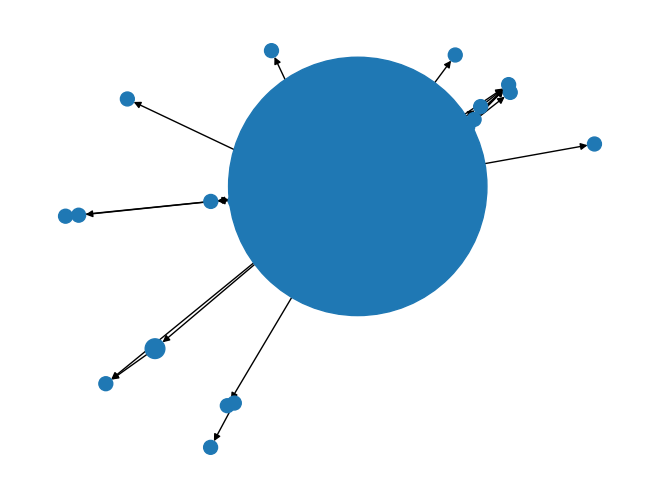

In [11]:
print('Número de componentes fortemente conectadas: ',
                                  nx.number_strongly_connected_components(F))
comp = nx.strongly_connected_components(F)
comp = list(comp)
g = nx.condensation(F)
plt.close('all')
nodet = [100*len(comp[k]) for k in range(len(comp))]
nx.draw(g,node_size=nodet)
nos = set(F.nodes)
for k in range(len(comp)):
  n = len(comp[k])
  print('Componente {:2d}, Tamanho: {:3d} '.format(k,n))
  if n > 1:
   print('-----------------------')
   print('Componente {:2d}:'.format(k))
   G = F.copy()
   G.remove_nodes_from(nos-set(comp[k]))
   print('Diâmetro:          {:5d}'.format(nx.diameter(G)))
   print('Comprimento médio: {:.3f}'.format(nx.average_shortest_path_length(G)))


In [15]:
freq = nx.degree_histogram(F) # lista com as frequências de ocorrência
                              # grau 0 , grau 1 , etc .
print(freq)

[0, 5, 282, 1, 86, 4, 36, 4, 23, 2, 14, 4, 8, 3, 6, 1, 6, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


O histograma resultante, de acordo com a  frequência de ocorrência de graus de entradas e graus de saídas da rede gerada, pode ser observado a seguir:

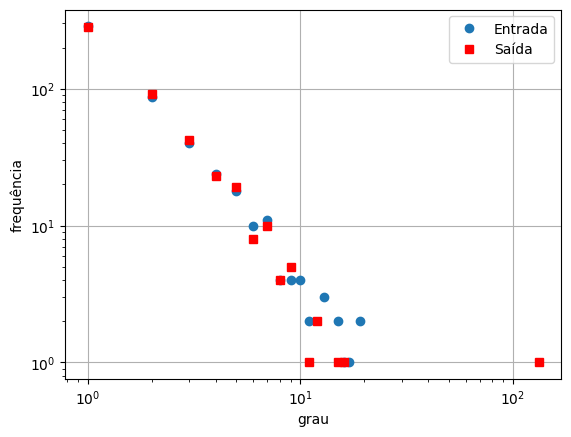

In [17]:
gri = list(dict(F.in_degree).values())
hin = [gri.count(k) for k in range(max(gri)+1)]
gro = list(dict(F.out_degree).values())
hou = [gro.count(k) for k in range(max(gro)+1)]

plt.close('all')
plt.figure()
plt.loglog(hin,'o',label='Entrada')
plt.loglog(hou,'rs',label='Saída')
plt.ylabel('frequência')
plt.xlabel('grau')
plt.legend()
plt.grid()

In [18]:
gri = list(dict(F.in_degree).values())
hin = [gri.count(k) for k in range(max(gri)+1)]
gro = list(dict(F.out_degree).values())
hou = [gro.count(k) for k in range(max(gro)+1)]
print(gri)
print(gro)


[0, 1, 1, 11, 1, 19, 3, 4, 13, 16, 19, 3, 2, 5, 4, 11, 15, 9, 2, 5, 2, 7, 1, 4, 3, 2, 2, 10, 6, 3, 13, 2, 6, 6, 6, 9, 6, 3, 2, 5, 1, 7, 15, 7, 3, 1, 3, 2, 7, 6, 2, 13, 17, 7, 3, 5, 2, 2, 3, 2, 1, 4, 5, 1, 6, 7, 7, 6, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 4, 7, 3, 1, 1, 2, 1, 1, 1, 3, 6, 1, 4, 10, 4, 2, 5, 8, 5, 5, 1, 1, 2, 2, 3, 2, 4, 2, 5, 4, 3, 2, 1, 1, 1, 1, 2, 3, 4, 1, 9, 7, 5, 1, 1, 2, 3, 8, 3, 2, 4, 6, 2, 4, 10, 8, 2, 7, 2, 1, 2, 1, 1, 3, 4, 2, 3, 4, 3, 1, 2, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 3, 4, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 5, 1, 3, 2, 3, 5, 1, 2, 1, 1, 1, 8, 1, 9, 1, 5, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 7, 1, 1, 4, 2, 5, 1, 3, 4, 2, 1, 10, 2, 5, 2, 1, 3, 4, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 5, 3, 1, 1, 5, 1, 4, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 4, 1, 3, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 3, 3, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 3, 1, 4, 2, 2, 1, 